<a href="https://colab.research.google.com/github/cristinapopescu19/Projects/blob/An-num/Exc_1_An_num.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```

```

# Tema laboratorul 1:

a. Sa se construiasca graficul functiei $$f(x) = e^{-\frac{x}{2}}(x^2 + 2x - 8)$$
pe intervalul $[-3,3]$ si dreapta de ecuatie $y=0$ in acelasi sist. $xOy.$








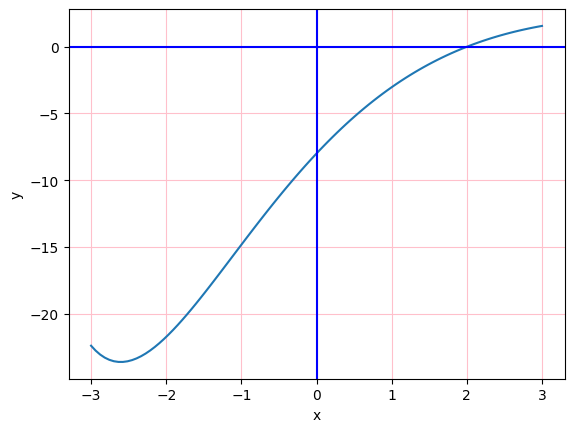

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.exp(-x/2)*(x**2+2*x-8)
def plot(f,a,b,nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a,b,100) #discretizam intervalul
    y_graf = f(x_graf)
    ax.plot(x_graf, y_graf, linestyle = '-')
    ax.grid(True, color = 'pink')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.axhline(y=0, color = 'b')
    ax.axvline(x=0, color = 'b')
    return ax # pt ca vrem poate sa facem adaugiri pe grafic
ax = plot(f, -3, 3, 1)



b. Sa se creeze un fisier script pentru a calcula $x_{10}$, care aproximeaza solutia ecuatiei $f(x)=0$ pe intervalul $[-3,3]$ prin metoda bisectiei.

In [ ]:
import numpy as np

# limitele intervalului
a = -3
b = 3
x_mid = (a + b) / 2 # mijlocul intervalului

# Verificam semnul functiei la capetele intervalului
f_a = f(a)
f_b = f(b)
if f_a * f_b > 0:
    print("Nu exista solutie in intervalul dat.")
else:
    # Alegem in ce jumatate a intervalului cautam solutia
    if f_a * f(x_mid) < 0:
        b = x_mid
    else:
        a = x_mid
    x_10 = (a + b) / 2 # Calculam x_10
    print(f"Soluția x_10 este: {x_10}")


Soluția x_10 este: 1.5



c. Fie $x^{\star}=2$ soluţia exactă a acestei ecuaţii. Să se calculeze eroarea absolută $\operatorname{err}_{\mathrm{a}}\left(x_n\right)=\left|x^{\star}-x_n\right|$ şi eroarea relativă $\operatorname{err}_{\mathrm{r}}\left(x_n\right)=\left|x^{\star}-x_n\right| /\left|x^{\star}\right|, n=\overline{1,10}$, şi să se reprezinte grafic.

[2.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]
[1.0, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625]


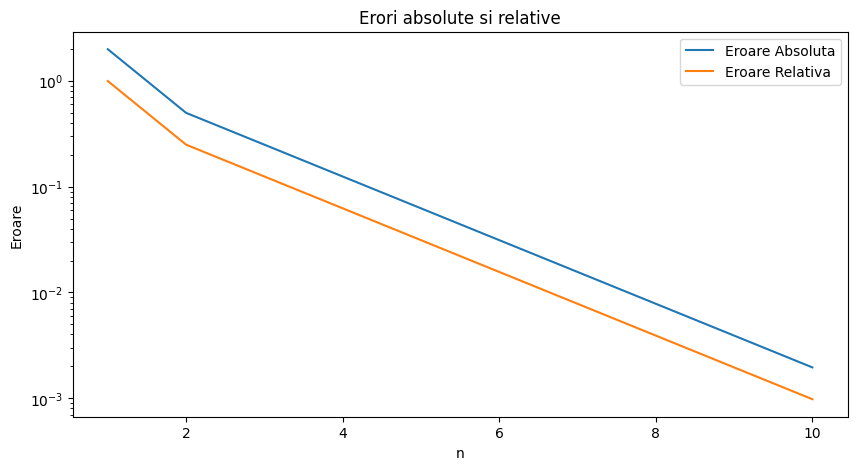

In [ ]:
# definim intervalul [a, b]
a = -3
b = 3
# definim radacina
x_star = 2
# listele pentru stocarea erorilor
abso_err = []
rel_err = []

# calculam erorile pentru fiecare aproximare x_n
for i in range(1, 11):
    x_n = (a + b) / 2  # Calculeaza x_n folosind metoda bisectiei
    abso_err_n = abs(x_star - x_n)
    rel_err_n = abso_err_n / abs(x_star)
    abso_err.append(abso_err_n)
    rel_err.append(rel_err_n)

    # Actualizam limitele intervalului in functie de semnul lui f
    if f(a) * f(x_n) < 0:
        b = x_n
    else:
        a = x_n

# Retinem valorile pentru x_n
x_values = np.arange(1, 11)
x_approximations = [(a + b) / 2 for _ in range(1, 11)]
print(abso_err)
print (rel_err)
# Reprezentam erorile
plt.figure(figsize=(10, 5))
plt.plot(x_values, abso_err, label="Eroare Absoluta")
plt.plot(x_values, rel_err, label="Eroare Relativa")
plt.xlabel("n")
plt.ylabel("Eroare")
plt.yscale("log")
plt.legend()
plt.title("Erori absolute si relative")
plt.show()






# **Tema laboratorul 2:**

EX\#2 Fie $g:[-1,1] \longrightarrow \mathbb{R}, g(x)=x+\mathrm{e}^{-x^2} \cos x$.

(a) Reprezentaţi graficul funcţiei $g$ şi salvaţi imaginea cu numele Graficf.eps

(b) Creaţi o funcţie NewtonRaphsonf care are ca date intrare (i) funcţia $g$, (ii) derivata acesteia $g^{\prime}$, (iii) aproximarea iniţială $x_0$ şi numărul maxim de iteraţii $N$, iar ca date de ieşire primele $N$ aproximări ale rădăcinii funcţiei $g$ generate de metoda NewtonRaphson. Rulaţi funcţia NewtonRaphsonf pentru $g$ şi $g^{\prime}$ corespunzătoare EX\#2, $x_0=0$ şi $N=10$.

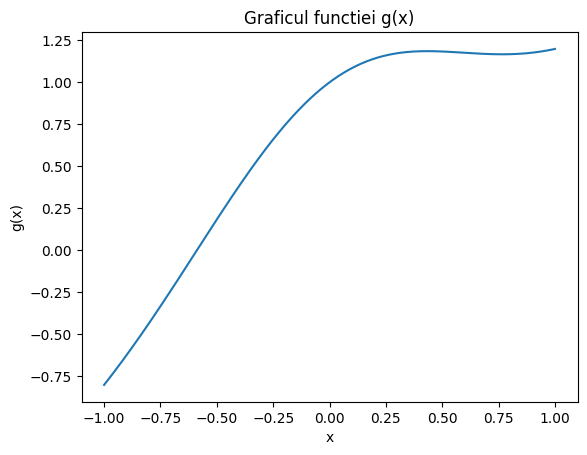

In [ ]:
#a)
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')
g_expr = x + sp.exp(-x**2) * sp.cos(x)

g_func = sp.lambdify(x, g_expr, 'numpy') #convertim expresia SymPy g_expr într-o fct. NumPy pentru a o evalua numeric

x_values = np.linspace(-1, 1, 400) #vector cu 400 de valori in intervalul (-1 , 1)
y_values = g_func(x_values)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Graficul functiei g(x)')
plt.savefig('Graficf.eps') #pentru salvarea imaginii
plt.show()


In [ ]:
#b)

def NewtonRaphsonf(g, dg, x0, N):
    x = np.zeros(N + 1) #Initializam un vector x de lungime N + 1 pentru a stoca aproximarile radacinii
    x[0] = x0
    for n in range(1, N + 1): #iteram de la 1 la N
        x[n] = x[n - 1] - f(x[n - 1]) / dg(x[n - 1]) #calculam o noua aproximare a radacinii folosind metoda Newton-Raphson
    return x

x = sp.symbols('x')
dg_expr = g_expr.diff(x)
dg_fun = sp.lambdify(x, dg_expr, 'numpy')

x0 = 0
N = 10
sol_NR = NewtonRaphsonf(g_func, dg_fun, x0, N)

print("Aproximarile radacinii fct. g:")
print(sol_NR)


Aproximarile radacinii fct. g:
[0.         8.         6.681274   4.91048465 2.68426277 1.49305565
 3.01417689 1.4391706  3.23436719 1.46250565 3.13353449]


EX\#3 (a) Creaţi fişierul funcţie NewtonRaphson cu datele de intrare $h, h^{\prime}$, prima aproximare $x_0$ şi toleranţa TOL şi data de ieşire $x_{\text {aprox }}$, generat de metoda Newton-Raphson şi criteriul de oprire $\left|h\left(x_n\right)\right|<$ TOL.

(b) Fie $h:[0, \pi / 2] \longrightarrow \mathbb{R}, h(x)=\cos x-x, x_0=\pi / 4$ şi TOL $=10^{-8}$. Apelaţi funcţia creată la subpunctul (a) pentru aceste date de intrare.
Afişati, în acelaşi sistem de coordonate $x O y$, graficul funcţiei $h$, dreapta de ecuaţie $y=0$ şi şirul de aproximări generat.

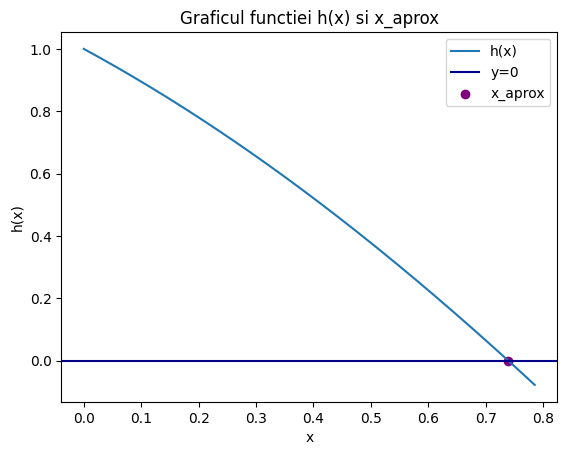

Aproximarea rădăcinii: 0.7390851332151611


In [ ]:
#a)
def NewtonRaphson(h, dh, x0, TOL):
    x = x0
    #verificam criteriul de oprire, bucla se opreste cand valoarea absoluta a lui h(x)<TOL,i.e. cand gasim o aproximare buna pentru radacina.
    while abs(h(x)) >= TOL:
        x = x - h(x) / dh(x)
    return x

#b)
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')
h_expr = sp.cos(x) - x
dh_expr = h_expr.diff(x)

h_fun = sp.lambdify(x, h_expr, 'numpy')
dh_fun = sp.lambdify(x, dh_expr, 'numpy')

x0 = np.pi / 4
TOL = 10**(-8)
N = 5
# Calculam aproximarea radacinii cu NewtonRaphsonf
x_aprox = NewtonRaphson(h_fun, dh_fun, x0, TOL)

# Generam datele pentru grafic
x_values = np.linspace(0, np.pi / 4, 400)
y_values = h_fun(x_values)

# Afisam graficul functiei, dreapta y=0 și aproximarea radacinii
plt.plot(x_values, y_values, label='h(x)')
plt.axhline(0, color='darkblue', linestyle='-', label='y=0')
plt.scatter(x_aprox, h_fun(x_aprox), color='purple', marker='o', label='x_aprox')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('Graficul functiei h(x) si x_aprox')
plt.legend()
plt.show()

print("Aproximarea rădăcinii:", x_aprox)
